In [1]:
import sklearn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from fomlads.evaluate.eval_regression import train_and_test_partition
from fomlads.evaluate.eval_regression import train_and_test_filter
from fomlads.evaluate.eval_regression import create_cv_folds

In [2]:
dataset = pd.read_csv('/Users/ash/Documents/Year 4/Foundations of Machine Learning/Project/Used Dataset.csv')

In [3]:
# Produce inputs and target from dataset

number_of_columns = 14
inputs = dataset.iloc[:, 0:13].to_numpy()
targets = dataset['track_genre'].to_numpy()
print(inputs)
print(targets)

[[4.40000e+01 6.21000e-03 7.11000e-01 ... 3.82000e-02 1.42065e+02
  6.07000e-01]
 [3.40000e+01 3.47000e-01 7.29000e-01 ... 1.84000e-01 7.99690e+01
  2.87000e-01]
 [3.90000e+01 9.18000e-01 4.84000e-01 ... 3.46000e-02 8.27070e+01
  2.06000e-01]
 ...
 [5.10000e+01 5.97000e-03 6.93000e-01 ... 1.46000e-01 1.31079e+02
  3.95000e-01]
 [6.50000e+01 8.31000e-02 7.82000e-01 ... 4.41000e-02 7.58860e+01
  3.54000e-01]
 [6.70000e+01 1.02000e-01 8.62000e-01 ... 1.01000e-01 9.92010e+01
  7.65000e-01]]
['Jazz' 'Jazz' 'Jazz' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']


In [4]:
# Split the dataset into training + validation data and testing data

train_filter, test_filter = train_and_test_filter(len(dataset))

train_validation_inputs, train_validation_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_filter, test_filter)

In [5]:
# Partition the training + validation data into training data and validation data

N = len(dataset)
number_of_folds = 4
random_seed = 1
np.random.seed(random_seed)
folds = create_cv_folds(N, number_of_folds)  

train_inputs = []
train_targets = []
validation_inputs = []
validation_targets = []

for i in range(number_of_folds):
    train_inputs1, train_targets1, validation_inputs1, validation_targets1 = train_and_test_partition(inputs, targets, folds[i][0], folds[i][1])
    train_inputs.append(train_inputs1)
    train_targets.append(train_targets1)
    validation_inputs.append(validation_inputs1)
    validation_targets.append(validation_targets1)
    
print(train_inputs)
print(train_targets)
print(validation_inputs)
print(validation_targets)

# Their lengths should be the same as the number of folds

print(len(train_inputs))
print(len(train_targets))
print(len(validation_inputs))
print(len(validation_targets))

[array([[4.40000e+01, 6.21000e-03, 7.11000e-01, ..., 3.82000e-02,
        1.42065e+02, 6.07000e-01],
       [3.40000e+01, 3.47000e-01, 7.29000e-01, ..., 1.84000e-01,
        7.99690e+01, 2.87000e-01],
       [3.60000e+01, 3.45000e-02, 4.73000e-01, ..., 6.30000e-02,
        1.04694e+02, 3.83000e-01],
       ...,
       [5.90000e+01, 3.34000e-02, 9.13000e-01, ..., 2.98000e-01,
        9.80280e+01, 3.30000e-01],
       [7.20000e+01, 1.57000e-01, 7.09000e-01, ..., 5.50000e-02,
        1.22043e+02, 1.13000e-01],
       [6.50000e+01, 8.31000e-02, 7.82000e-01, ..., 4.41000e-02,
        7.58860e+01, 3.54000e-01]]), array([[3.90000e+01, 9.18000e-01, 4.84000e-01, ..., 3.46000e-02,
        8.27070e+01, 2.06000e-01],
       [3.60000e+01, 3.45000e-02, 4.73000e-01, ..., 6.30000e-02,
        1.04694e+02, 3.83000e-01],
       [6.30000e+01, 6.99000e-01, 5.80000e-01, ..., 2.69000e-02,
        9.30370e+01, 3.64000e-01],
       ...,
       [5.10000e+01, 5.97000e-03, 6.93000e-01, ..., 1.46000e-01,
        

In [6]:
# LOGISTIC REGRESSION

# Perform cross-validation for each hyperparameter value on training + validation data

powers_of_ten = np.linspace(-4, 5, 10)
ten = np.full(10, 10)
list_of_parameters = list(np.power(ten, powers_of_ten, dtype = float))

mean_accuracies = []

for parameter in list_of_parameters:
    accuracy_j = []
    for i in range(number_of_folds):
        LogReg = LogisticRegression(C = parameter, max_iter = 10000)
        LogReg.fit(train_inputs[i], train_targets[i])
        predict_targets = LogReg.predict(validation_inputs[i])
        accuracy_for_fold_i = accuracy_score(validation_targets[i], predict_targets)
        accuracy_j.append(accuracy_for_fold_i)
    mean_accuracy_j = np.mean(accuracy_j)
    mean_accuracies.append(mean_accuracy_j)

print(mean_accuracies)

[0.43802018771028867, 0.4030458650610944, 0.4031786789445723, 0.4031344076500797, 0.4031786789445723, 0.4031786789445723, 0.4031786789445723, 0.4031786789445723, 0.4031786789445723, 0.4031786789445723]


In [8]:
# Choose the best hyperparameter value averaged over folds by finding the highest 
# mean accuracy

mean_accuracies_list = np.array(mean_accuracies)
index_of_max_mean = mean_accuracies_list.argmax()
best_lambda = list_of_parameters[index_of_max_mean]

print(best_lambda)

0.0001


In [9]:
# Retrain Logisitic Regression with the best hyperparameter value on ALL training + 
# validation data and predict inputs from testing data

LogReg2 = LogisticRegression(C = best_lambda, max_iter = 10000)
LogReg2.fit(train_validation_inputs, train_validation_targets)
predict_targets2 = LogReg2.predict(test_inputs)
accuracy = accuracy_score(test_targets, predict_targets2)

print(accuracy)

0.4704519119351101


Text(0.5, 1.0, 'Accuracy with its corresponding lambda')

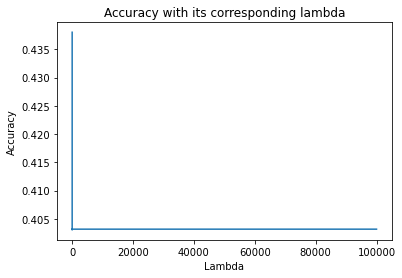

In [10]:
# Plot the accuracies

plt.figure()
plt.plot(list_of_parameters, mean_accuracies, '-')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy with its corresponding lambda')

In [11]:
# Calculate the confidence interval

mean_LogReg_accuracies = np.mean(mean_accuracies)
std_LogReg_accuracies = np.std(mean_accuracies, ddof = 1)
confidence_interval = stats.t.interval(0.95, 100000 - 1, mean_LogReg_accuracies, std_LogReg_accuracies / (100000 ** (1/2)))

print(mean_LogReg_accuracies)
print(confidence_interval)

0.4066451213033469
(0.4065767933061204, 0.4067134493005734)
